<a href="https://colab.research.google.com/github/paolayela/Talento-TECH/blob/main/Actividad2_4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#cargamos el conjunto de datos mnist
mnist=keras.datasets.mnist

#Dividimos los datos en entrenamiento y prueba
(train_images,train_label),(test_images,test_label)=mnist.load_data()

print(test_label[:30])


11490434/11490434 [==============================] - 0s 0us/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [ ]:
#normalizacion de los valores de los pixeles
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
#construmos el modelo de clasificacion
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
#Compilar el modelo
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 68s 33ms/step - loss: 0.1250 - accuracy: 0.9613
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0419 - accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 5/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0162 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0120 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 46s 25m

<Axes: >

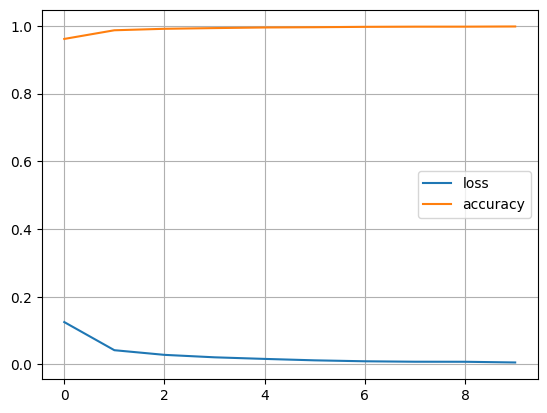

In [ ]:
#Entrenamiento del modelo
history=model.fit(train_images,train_label,epochs=10)

#graficar el entrenamiento del modelo
pd.DataFrame(history.history).plot(grid=True)

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, acuracy=model.evaluate(train_images,train_label)
print(f'perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {acuracy}')

loss, acuracy=model.evaluate(test_images,test_label)
print(f'perdida en el conjunto de prueba: {loss}')
print(f'Precision en el conjunto de prueba: {acuracy}')


1875/1875 [==============================] - 18s 9ms/step - loss: 0.0024 - accuracy: 0.9991
perdida en el conjunto de entrenamiento: 0.0024096283596009016
Precision en el conjunto de entrenamiento: 0.9991499781608582
313/313 [==============================] - 4s 12ms/step - loss: 0.0353 - accuracy: 0.9920
perdida en el conjunto de prueba: 0.03528967127203941
Precision en el conjunto de prueba: 0.9919999837875366


In [ ]:
#prediccion
index=1
print(f'label {test_label[index]}')
clasificacion=model.predict(test_images[index:index+1])
print(f'prediccion: {(clasificacion.reshape(-1,1))}')


label 2
1/1 [==============================] - 0s 133ms/step
prediccion: [[2.04684731e-08]
 [1.34318555e-11]
 [1.00000000e+00]
 [1.74062772e-21]
 [9.38095681e-15]
 [2.36176599e-22]
 [6.13118389e-13]
 [1.42045589e-17]
 [3.27619977e-14]
 [1.40149055e-14]]


In [ ]:
#seleccion de imagenes de interes
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(test_label[FIRST_IMAGE])
print(test_label[SECOND_IMAGE])
print(test_label[THIRD_IMAGE])

0
0
0


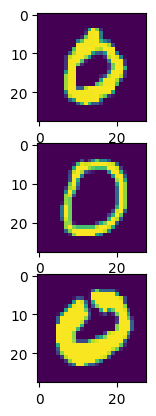

In [ ]:
#visualizacion de imagenes
f, axarr=plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [ ]:
layer=0
filter1=0
filter2=10

layer_ouput=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_ouput)

1/1 [==============================] - 0s 20ms/step


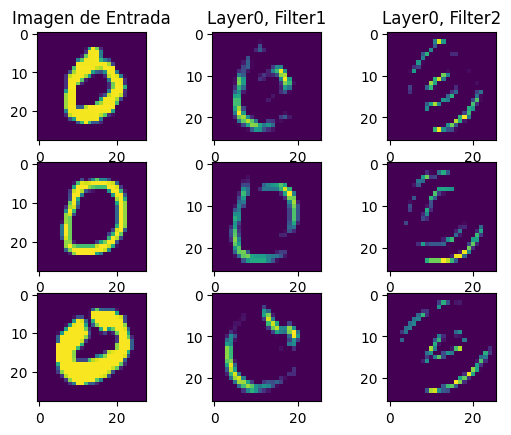

In [ ]:
#visualizacion de convoluciones
f, axarr=plt.subplots(3,3)

axarr[0,0].set_title('Imagen de Entrada')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+ str(layer)+', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+ str(layer)+', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f1=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f1[0,:,:,filter1])
axarr[1,2].imshow(f1[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
f1=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f1[0,:,:,filter1])
axarr[2,2].imshow(f1[0,:,:,filter2])

1/1 [==============================] - 0s 21ms/step


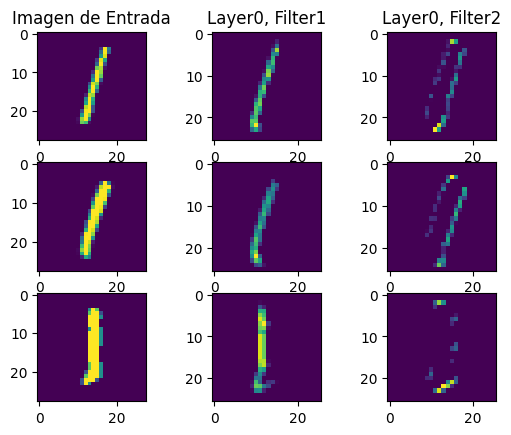

In [ ]:
#seleccion de imagenes de interes
FIRST_IMAGE=2
SECOND_IMAGE=5
THIRD_IMAGE=14

#visualizacion de convoluciones
f, axarr=plt.subplots(3,3)

axarr[0,0].set_title('Imagen de Entrada')
axarr[0,0].imshow(test_images[FIRST_IMAGE])
f1=activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+ str(layer)+', Filter1')
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+ str(layer)+', Filter2')
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
f1=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(f1[0,:,:,filter1])
axarr[1,2].imshow(f1[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(28,28))
f1=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(f1[0,:,:,filter1])
axarr[2,2].imshow(f1[0,:,:,filter2])